In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_csv = {}
df_centerline = {}
for i in range(1,5):
    df_csv[i] = pd.read_csv("./refined_x"+str(i)+"/fhr_plank_multiphysics_csv.csv")
    df_centerline[i] = pd.read_csv("./refined_x"+str(i)+"/fhr_plank_multiphysics_csv_flux_centerline_0003.csv")

In [8]:
ave_temp = {}
ave_temp_diff = {}
max_temp = {}
max_temp_diff = {}
for i in range(1,5):
    ave_temp[i] = round(df_csv[i]["temp_ave"][3],3)
    max_temp[i] = round(df_csv[i]["temp_max"][3],3)
    if i > 1:
        ave_temp_diff[i] = round(df_csv[i]["temp_ave"][3]-df_csv[i-1]["temp_ave"][3],3)
        max_temp_diff[i] = round(df_csv[i]["temp_max"][3]-df_csv[i-1]["temp_max"][3],3)
data = [ave_temp, ave_temp_diff, max_temp, max_temp_diff]

In [9]:
df_comparison = pd.DataFrame(data, index =['ave_temp', 'ave_temp_diff', 'max_temp', 'max_temp_diff'])

In [10]:
df_comparison = df_comparison.transpose()
df_comparison

,ave_temp,ave_temp_diff,max_temp,max_temp_diff
1,1011.209,NaN,1126.219,NaN
2,1017.630,6.421,1127.711,1.492
3,1020.021,2.390,1128.434,0.723
4,1021.527,1.506,1129.726,1.292


2 0.839
3 0.313
4 0.184


Text(0.5, 1.0, 'AHTR Slab Temperature Distribution')

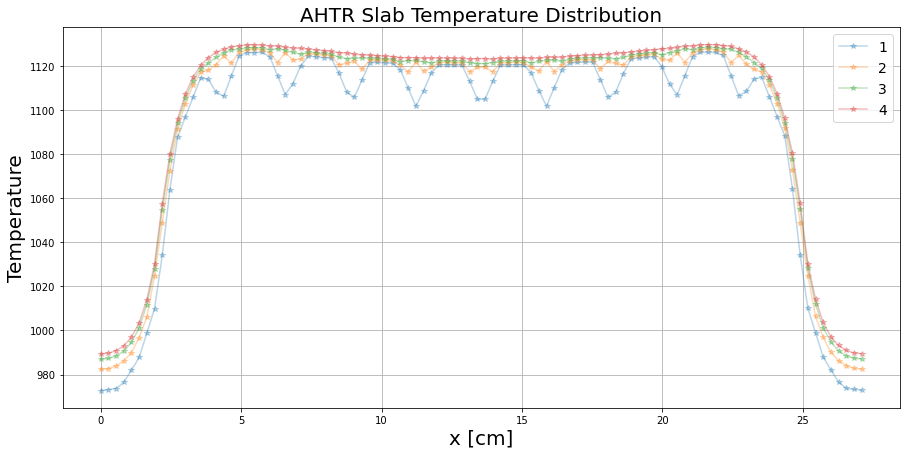

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
for i in range(1,5):
    alpha = 0.3
    ax.plot(df_centerline[i]['x'], df_centerline[i]['temp'], marker='*', label=i, alpha=alpha)
    #print(round(np.mean(abs(all_slab_temp - np.array(df_centerline[t]['temp']))),3))
    if i > 1:
        print(i, round(np.linalg.norm(np.array(df_centerline[i]['temp']-df_centerline[i-1]['temp']))/len(df_centerline[i-1]['temp']),3))
ax.grid()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=14, bbox_to_anchor = [1.0, 1.0])
#ax.set_ylim(1120, 1130)
ax.set_xlabel("x [cm]", fontsize=20)
ax.set_ylabel("Temperature", fontsize=20)
ax.set_title('AHTR Slab Temperature Distribution', fontsize=20)